In [4]:
import itertools
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [6]:


file_path = 'wind_dataset.csv'



In [7]:


df_germany = pd.read_csv(file_path)



In [8]:


df_germany.head()



,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [12]:
# We need to convert the DATE dtype from object to a datetime

df_germany['DATE'] = pd.to_datetime(df_germany['DATE'])

df_germany['YEAR'] = df_germany['DATE'].dt.year
df_germany['MONTH'] = df_germany['DATE'].dt.month
df_germany['DAY'] = df_germany['DATE'].dt.day

In [17]:


df_germany.set_index(pd.to_datetime(df_germany.DATE, format="%d-%m-%Y"), drop=True, inplace=True)
df_germany.drop('DATE', axis=1, inplace=True)



In [18]:


df_germany.head()



,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
DATE,,,,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5


In [19]:


df_germany.shape



(6574, 11)

In [20]:


df_germany = df_germany.loc['1970-01-01':]



In [21]:


df_germany.shape



(3287, 11)

In [22]:


count_nan = len(df_germany) - df_germany.count()
count_nan



WIND        0
IND         0
RAIN        0
IND.1       0
T.MAX       3
IND.2       0
T.MIN      34
T.MIN.G    71
YEAR        0
MONTH       0
DAY         0
dtype: int64

In [23]:


df_germany = df_germany.sort_index()



In [29]:
df_germany.RAIN.fillna(method='pad', inplace=True)

In [27]:


count_nan = len(df_germany) - df_germany.count()
count_nan



WIND        0
IND         0
RAIN        0
IND.1       0
T.MAX       3
IND.2       0
T.MIN      34
T.MIN.G    71
YEAR        0
MONTH       0
DAY         0
dtype: int64

In [30]:


df_germany.describe()



,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
count,3287.000000,3287.000000,3287.000000,3287.000000,3284.000000,3287.000000,3253.000000,3216.000000,3287.000000,3287.000000,3287.000000
mean,9.443465,0.560998,1.788044,0.003651,13.370219,0.123517,6.706732,2.685790,1974.000000,6.523274,15.728628
std,4.795975,1.373331,3.862756,0.120806,4.913785,0.482137,4.629590,5.656729,2.582067,3.449133,8.801004
min,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,-11.500000,-13.500000,1970.000000,1.000000,1.000000
25%,5.830000,0.000000,0.000000,0.000000,9.700000,0.000000,3.400000,-1.400000,1972.000000,4.000000,8.000000
50%,8.870000,0.000000,0.200000,0.000000,13.100000,0.000000,6.800000,3.000000,1974.000000,7.000000,16.000000
75%,12.420000,0.000000,1.900000,0.000000,17.200000,0.000000,10.300000,7.000000,1976.000000,10.000000,23.000000
max,28.160000,4.000000,67.000000,4.000000,26.800000,4.000000,17.900000,15.800000,1978.000000,12.000000,31.000000


In [31]:


df_germany['Ticks'] = range(0,len(df_germany.index.values))



In [32]:


df_germany.head(10)



,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY,Ticks
DATE,,,,,,,,,,,,
1970-01-01,9.00,0,0.3,0.0,5.6,0.0,1.0,-1.5,1970,1,1,0
1970-01-02,8.58,0,0.3,0.0,6.8,0.0,1.2,1.2,1970,1,2,1
1970-01-03,5.13,0,2.0,0.0,1.1,1.0,-1.5,-6.0,1970,1,3,2
1970-01-04,8.92,0,0.1,0.0,0.8,1.0,-6.0,-12.0,1970,1,4,3
1970-01-05,12.33,0,0.5,0.0,2.5,1.0,-6.1,-11.5,1970,1,5,4
1970-01-06,10.34,0,0.0,0.0,2.2,1.0,-3.2,-8.0,1970,1,6,5
1970-01-07,8.58,0,0.3,0.0,4.6,1.0,-8.0,-13.5,1970,1,7,6
1970-01-08,19.08,0,3.1,0.0,8.0,1.0,-8.0,NaN,1970,1,8,7
1970-01-09,13.54,0,6.4,0.0,8.8,0.0,2.4,0.5,1970,1,9,8


In [33]:


df_germany.tail(10)



,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY,Ticks
DATE,,,,,,,,,,,,
1978-12-22,2.46,0,1.9,0.0,6.4,1.0,-2.1,-6.2,1978,12,22,3277
1978-12-23,16.50,0,28.2,0.0,6.4,1.0,-1.7,-6.0,1978,12,23,3278
1978-12-24,12.25,0,4.9,0.0,6.5,0.0,4.3,4.1,1978,12,24,3279
1978-12-25,8.71,0,8.5,0.0,7.5,0.0,3.3,-0.2,1978,12,25,3280
1978-12-26,1.96,0,9.0,0.0,9.8,0.0,2.3,-2.0,1978,12,26,3281
1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,1978,12,27,3282
1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,1978,12,28,3283
1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,1978,12,29,3284
1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,1978,12,30,3285


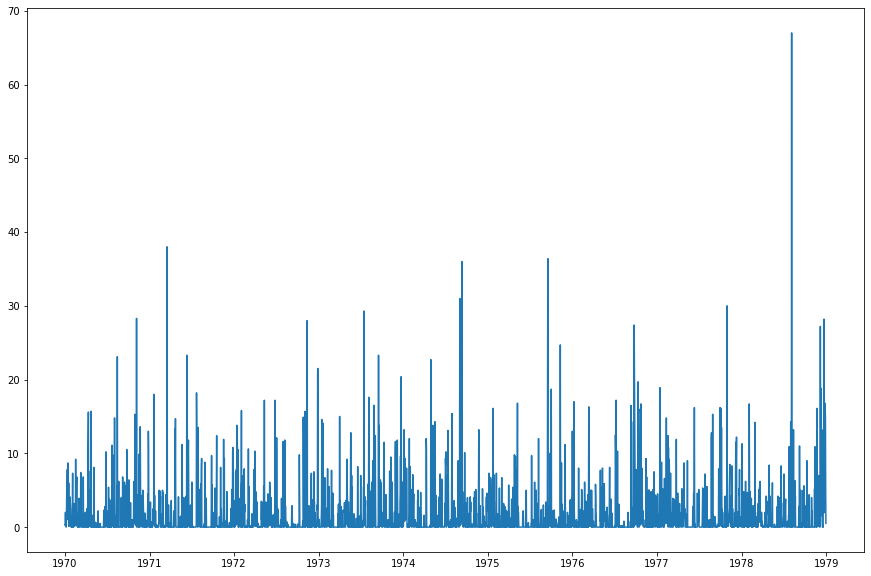

In [34]:


plt.plot(df_germany.RAIN)



In [35]:


def stationarity_check(ts):
    # Determing rolling statistics
    roll_mean = ts.rolling(12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)



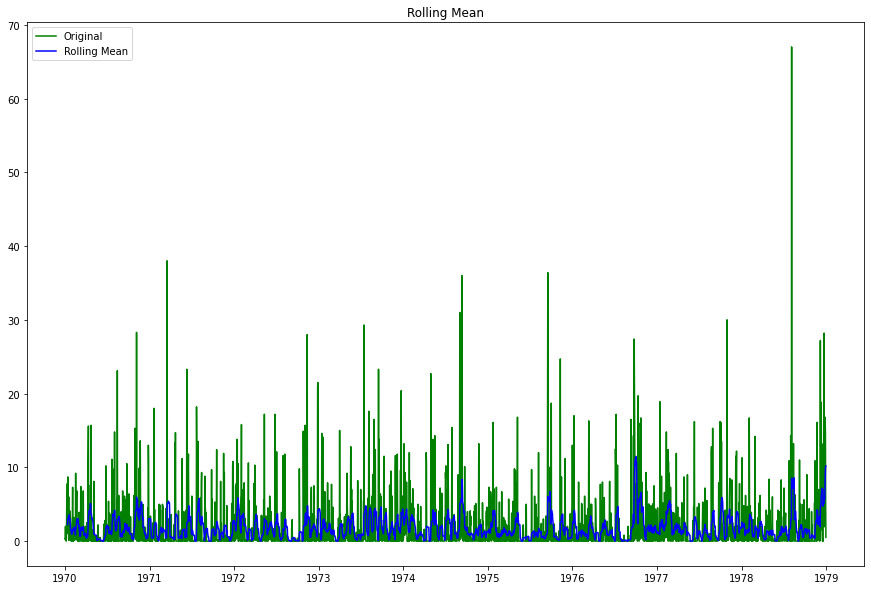

Augmented Dickey-Fuller test:
df_output: 
 Test Statistic                -1.128162e+01
p-value                        1.451491e-20
#Lags Used                     1.600000e+01
Number of Observations Used    3.270000e+03
dtype: float64
Test Statistic                -1.128162e+01
p-value                        1.451491e-20
#Lags Used                     1.600000e+01
Number of Observations Used    3.270000e+03
Critical Value (1%)           -3.432351e+00
Critical Value (5%)           -2.862424e+00
Critical Value (10%)          -2.567241e+00
dtype: float64


In [36]:
stationarity_check(df_germany.RAIN)

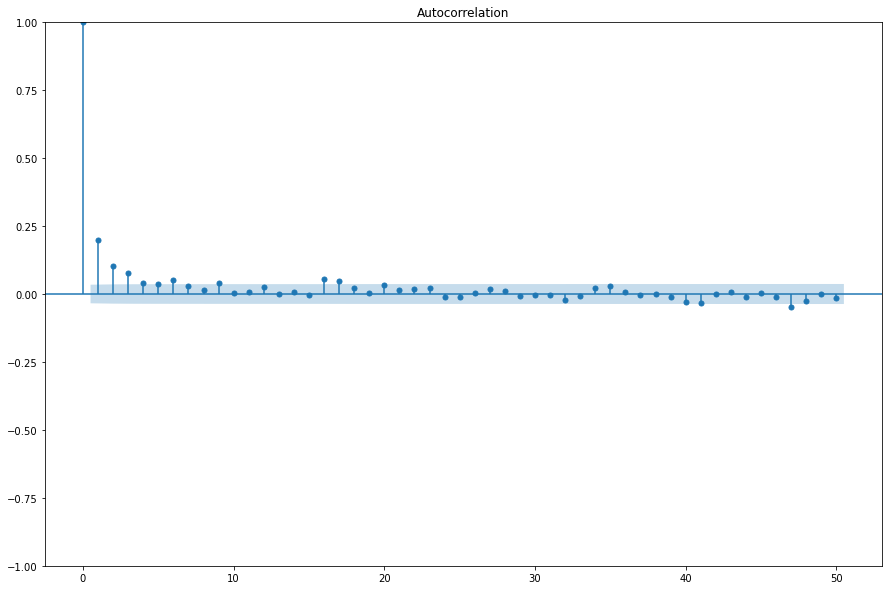

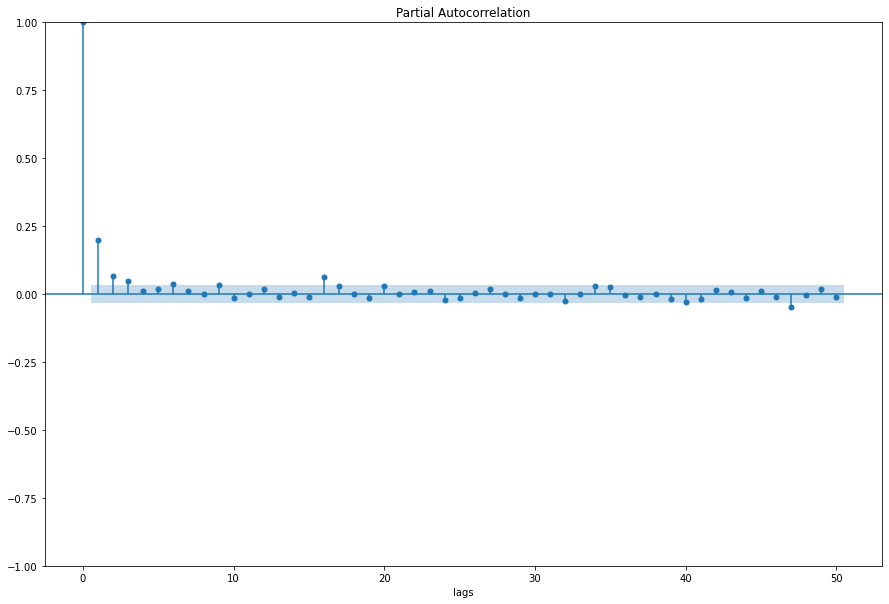

In [37]:
plot_acf(df_germany.RAIN, lags=50)
plot_pacf(df_germany.RAIN, lags=50)
plt.xlabel('lags')
plt.show()

In [38]:


p = q = range(1, 4)
print (p)



range(1, 4)


In [42]:
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df_germany.RAIN,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

In [46]:
p = q = range(0, 4)
r = range(0,2)
pqr = itertools.product(p, r, q)
for param in pqr:
    try:
        mod = ARIMA(df_germany.RAIN,order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{} - MSE:{}'.format(param, results.aic, np.sum(np.square(results.resid))))
    except:
        continue

In [49]:


mod = sm.tsa.statespace.SARIMAX(df_germany.RAIN,
                                order = (2, 0, 3),
                                seasonal_order= (0,0,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()



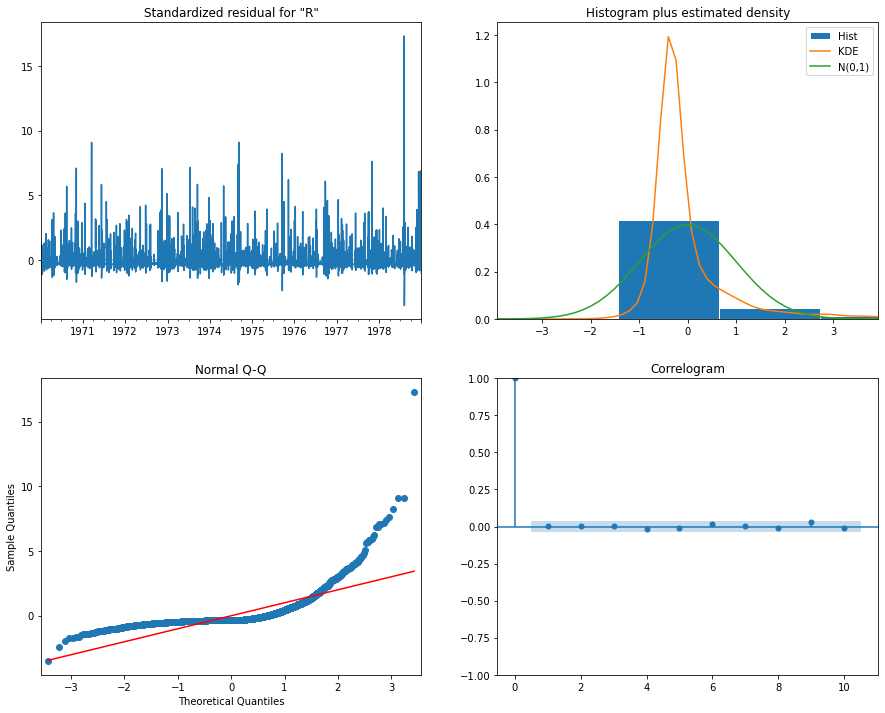

In [50]:


results.plot_diagnostics(figsize=(15, 12))
plt.show()

